X∼N($\mu$,$\sigma^2$) means X follows a normal (Gaussian) distribution with:
- Mean ($\mu$) = 100
- Variance ($\sigma^2$) = 100

Since standard deviation ($\sigma$) is the square root of variance:

$\sigma = \sqrt{100} = 10$ 

- loc → Mean
- scale → Standard deviation
- size → Number of values

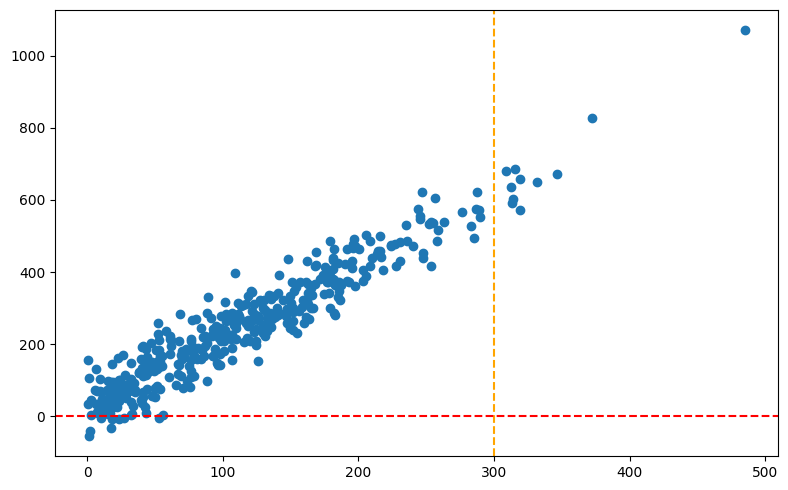

In [342]:
# 0. Simulate phone dataset
#a)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.absolute(np.random.normal(loc = 100, scale= 100, size=400))

epsilon = np.random.normal(loc= 0, scale=50 , size= 400)

Y = 2 * X + 25 + epsilon

plt.figure(figsize=(8, 5))
plt.scatter(X, Y)
plt.axvline(x=300, color="orange", linestyle = "--")
plt.axhline(y= 0, color="red", linestyle = "--")
plt.tight_layout()

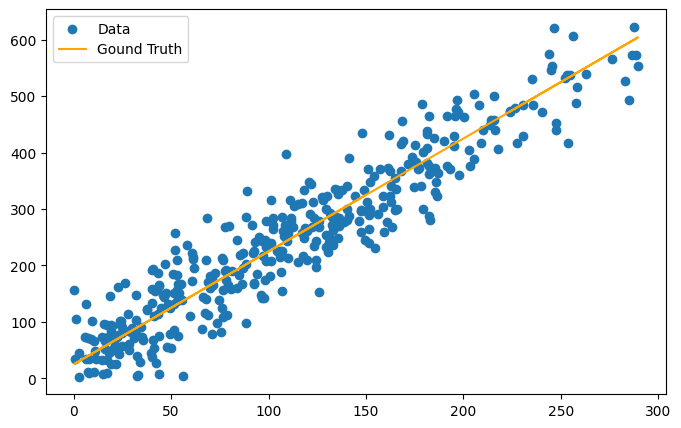

In [343]:
# b)

mask = (X < 300) & (Y >= 0)
X = X[mask]
Y = Y[mask]

def ground_truth(X):
    return 25 + 2 * X

y_gt = ground_truth(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Data")
plt.plot(X, y_gt, color='orange', linestyle='-', label='Gound Truth')
plt.legend()


In [344]:
# c)
data = {"Called minutes per month": X, "SEK per month": Y}
phone_data = pd.DataFrame(data)
phone_data

,Called minutes per month,SEK per month
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
376,53.082435,183.822512
377,71.313453,165.649148
378,235.387237,529.849510
379,88.546015,203.507950


In [345]:
# 1. Train|test split
#a)

def train_test_split(data, y_col, train_fraction=0.7, random_state=42, replace=False):

    train_fraction = int(len(data) * train_fraction)

    train = data.sample(n=train_fraction, random_state=random_state, replace=replace)
    test = data.drop(train.index)

    X_train, y_train = train.drop(y_col, axis="columns"), train[y_col]
    X_test, y_test = test.drop(y_col, axis="columns"), test[y_col]
    try:
        X_train.insert(0, "Intercept", 1)
        X_test.insert(0, "Intercept", 1)
    except ValueError:
        pass


    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(phone_data, "SEK per month")

X_train


,Intercept,Called minutes per month
266,1,39.978312
192,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
294,1,227.766490
206,1,213.556564
254,1,74.743185


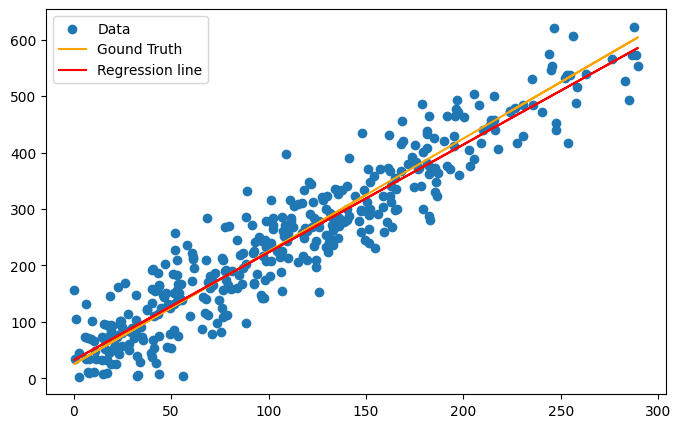

In [346]:
model = LinearRegression()

model.fit(X_train, y_train)
y_hat = model.predict(X_train)

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Data")
plt.plot(X, y_gt, color='orange', linestyle='-', label='Gound Truth')
plt.plot(X_train["Called minutes per month"], y_hat, color='red', linestyle='-', label='Regression line')
plt.legend()


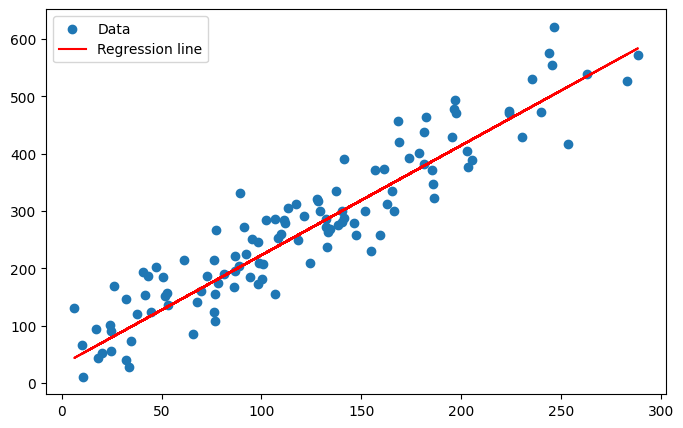

In [347]:
# a)
n = len(y_test) 
y_hat = model.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(X_test["Called minutes per month"], y_test, label="Data")
plt.plot(X_test["Called minutes per month"], y_hat, color='red', linestyle='-', label='Regression line')
plt.legend()

In [348]:
# b)



MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_hat))

MSE = np.divide(1, n) * np.sum(np.square(y_test - y_hat))

RMSE = np.sqrt(MSE)

RSE = np.sqrt(np.divide(1, n-X_test.shape[1]-2) * np.sum(np.square(y_test - y_hat)))

print (f" MAE, Mean absolute error on testing data: {MAE}\n MSE, Mean squared error on testing data: {MSE}\n RMSE, Root mean squared error on testing data: {RMSE}")

 MAE, Mean absolute error on testing data: 40.12002651149213
 MSE, Mean squared error on testing data: 2401.577128867728
 RMSE, Root mean squared error on testing data: 49.005888716232135


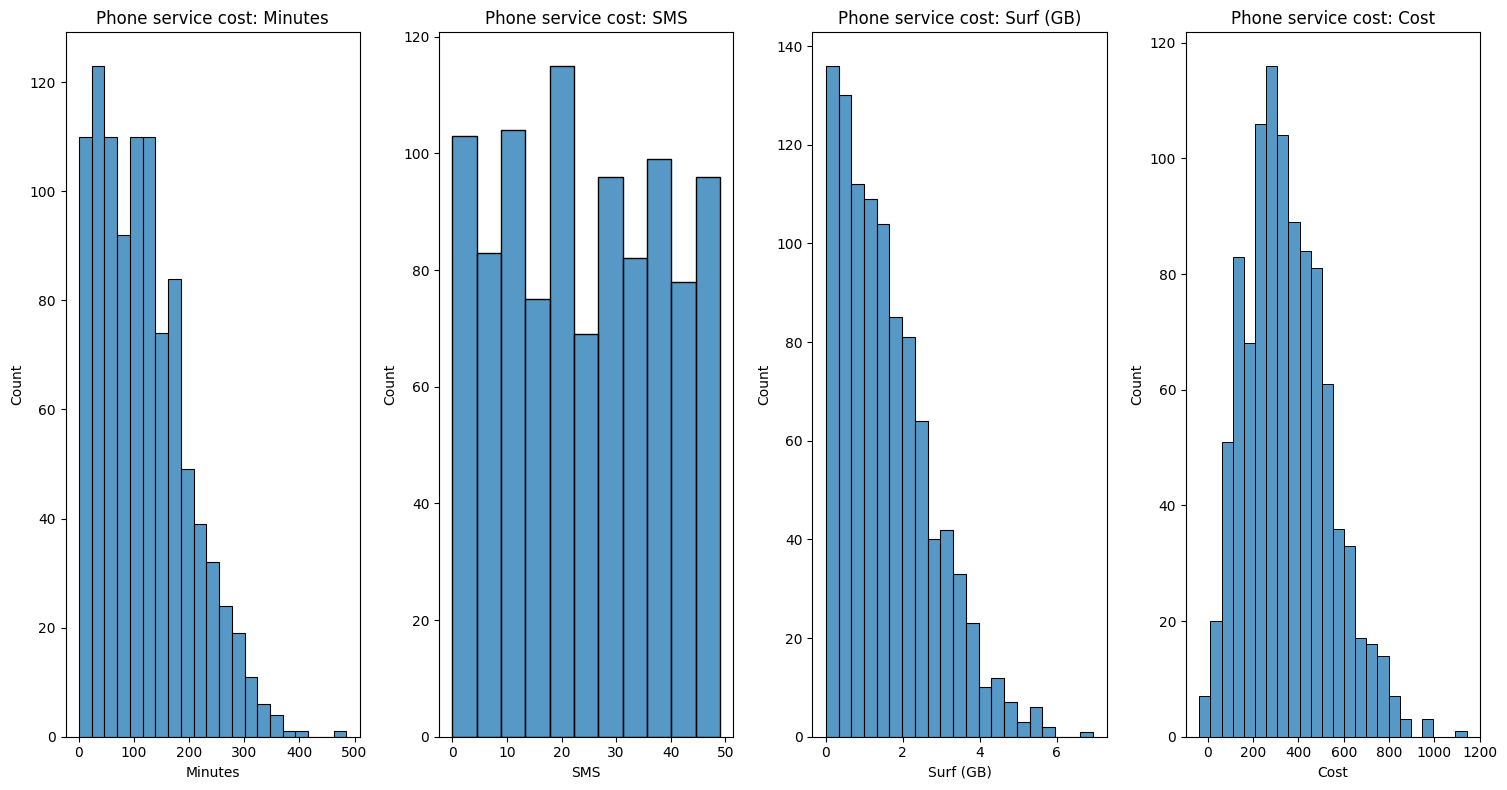

In [349]:
# 4. Simulate more explanatory variables

# a) 
np.random.seed(42)
x1 = np.absolute(np.random.normal(loc=100, scale=100, size=1000))
x2 = np.random.randint(low=0, high=50, size=1000)
x3 = np.absolute(np.random.normal(loc=0, scale=2, size=1000))
epsilon = np.random.normal(loc=0, scale=50, size=1000)
y = 25 + 2 * x1 + 0.5 * x2 + 50 * x3 + epsilon

phone_service_cost = pd.DataFrame({"Minutes":x1, "SMS": x2, "Surf (GB)": x3, "Cost": y})
phone_service_cost.insert(0, "Intercept", 1)

# b)

fig, ax = plt.subplots(1, 4, figsize=(15, 8), dpi=100)

for i, feature in enumerate(phone_service_cost.columns[1:5]):
    sns.histplot(data=phone_service_cost, x = feature, ax=ax[i])
    ax[i].set(xlabel=feature, title=f"Phone service cost: {feature}")
    ax[i].set(ylabel= "Count")

fig.tight_layout()  

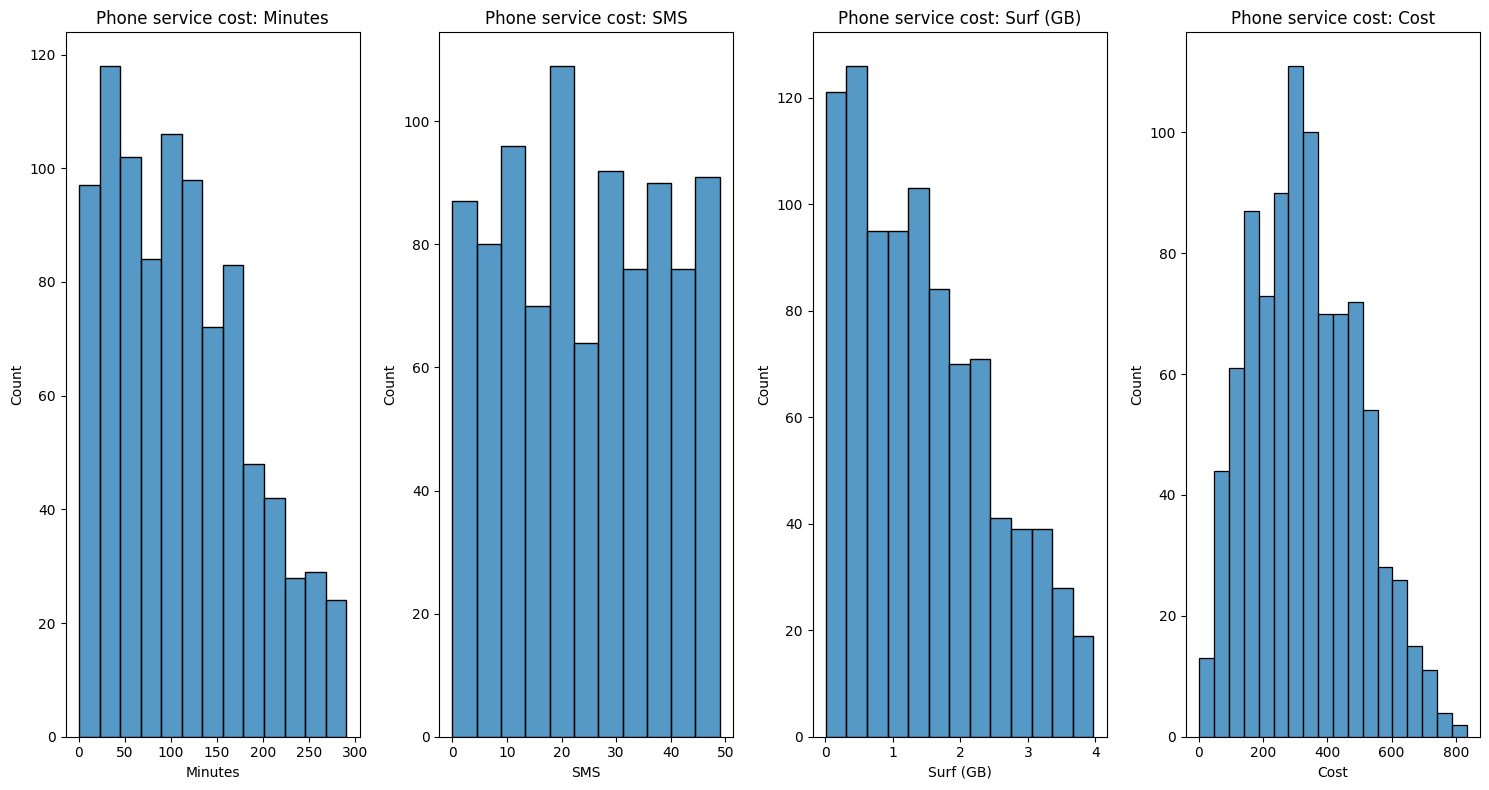

In [ ]:
# c)
# & (phone_service_cost["Cost/min"] > 300) & (phone_service_cost["y"] < 0))


mask = phone_service_cost[(phone_service_cost["Surf (GB)"] > 4) | (phone_service_cost["Minutes"] > 300) | (phone_service_cost["Cost"] < 0)].index
phone_service_cost.drop(mask, inplace=True)


fig, ax = plt.subplots(1, 4, figsize=(15, 8), dpi=100)

for i, feature in enumerate(phone_service_cost.columns[1:5]):
    sns.histplot(data=phone_service_cost, x = feature, ax=ax[i])
    ax[i].set(xlabel=feature, title=f"Phone service cost: {feature}")
    ax[i].set(ylabel= "Count")

fig.tight_layout()  

In [359]:
# 5. Multiple linear regression

# a)
X_train, X_test, y_train, y_test = train_test_split(phone_service_cost, "Cost")


model = LinearRegression()

model.fit(X_train, y_train)

n = len(y_test)

y_hat = model.predict(X_test)

MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_hat))

MSE = np.divide(1, n) * np.sum(np.square(y_test - y_hat))

RMSE = np.sqrt(MSE)

print (f" MAE, Mean absolute error on testing data: {MAE}\n MSE, Mean squared error on testing data: {MSE}\n RMSE, Root mean squared error on testing data: {RMSE}")

 MAE, Mean absolute error on testing data: 39.577900259394504
 MSE, Mean squared error on testing data: 2339.635636855177
 RMSE, Root mean squared error on testing data: 48.3697802026759


<Axes: >

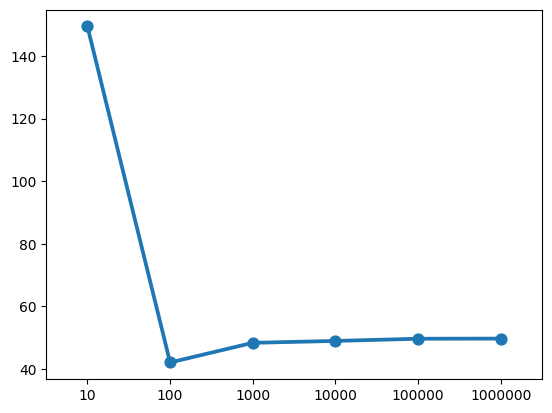

In [376]:
# d)
RMSE_dict = {}
sampels = [10, 100, 1000, 10000, 100000, 1000000]
for i in sampels:
    np.random.seed(42)
    x1 = np.absolute(np.random.normal(loc=100, scale=100, size=i))
    x2 = np.random.randint(low=0, high=50, size=i)
    x3 = np.absolute(np.random.normal(loc=0, scale=2, size=i))
    epsilon = np.random.normal(loc=0, scale=50, size=i)
    y = 25 + 2 * x1 + 0.5 * x2 + 50 * x3 + epsilon

    phone_service_cost = pd.DataFrame({"Minutes":x1, "SMS": x2, "Surf (GB)": x3, "Cost": y})
    phone_service_cost.insert(0, "Intercept", 1)

    mask = phone_service_cost[(phone_service_cost["Surf (GB)"] > 4) | (phone_service_cost["Minutes"] > 300) | (phone_service_cost["Cost"] < 0)].index
    phone_service_cost.drop(mask, inplace=True)

    X_train, X_test, y_train, y_test = train_test_split(phone_service_cost, "Cost")


    model = LinearRegression()

    model.fit(X_train, y_train)

    n = len(y_test)

    y_hat = model.predict(X_test)

    MSE = np.divide(1, n) * np.sum(np.square(y_test - y_hat))

    RMSE = np.sqrt(MSE)

    RMSE_dict[i] = RMSE

RMSE_dict
sns.pointplot(RMSE_dict)